# Introduction to Probabilistic Graphical Models 
# Practical Session 1
##### Emma Demarecaux   emma.demarecaux@ensta-paris.fr

In [1]:
# Import Python modules
import numpy as np
import matplotlib.pyplot as plt
import random
from IPython.display import Image

## Question 0
We often have to compute $s = \log\sum_{i=1}^I \exp\left(v_i\right)$, where each $v_i < 0$ and $|v_i| >> 1$. Without implementing a numerically stable algorithm, this computation can lead to NaN values. 

Indeed, $\forall i \in [\![1;I]\!]$: 
$$
\exp\left(v_i\right) \simeq 0
\Rightarrow \sum_{i=1}^I \exp\left(v_i\right) \simeq 0
\Rightarrow \log\sum_{i=1}^I \exp\left(v_i\right) = \textrm{NaN}
$$ 

Therefore, we need to use a trick in order to do this computation.

Let $v^* \equiv \max_{i \in [\![1;I]\!]} v_i$
\begin{align}
\log\sum_{i=1}^I \exp\left(v_i\right) &= \log\sum_{i=1}^I \exp\left(v_i - v^* + v^*\right) \\
           &= \log\sum_{i=1}^I \exp\left(v_i - v^*\right)\exp\left(v^*\right) \\
           &= \log\exp\left(v^*\right) + \log\sum_{i=1}^I \exp\left(v_i - v^*\right) \\
           &= v^* + \log\sum_{i=1}^I \exp\left(v_i - v^*\right) \\
\end{align}

We have $\sum_{i=1}^I \exp\left(v_i - v^*\right) \geq 1$, therefore the whole expression is numerically stable.

Let's implement it in Python.

In [2]:
def stable_log_sum_exp(v):
    v_max = np.max(v)
    return v_max + np.log(np.sum(np.exp(v - v_max)))

In [3]:
v = np.array([-1234, -1235])
stable_log_sum_exp(v)

-1233.6867383124818

## Question 1
### Task 1
The possible positions of the robot is a discrete set of $N$ locations. Let $S \equiv[\![0;N-1]\!]$ be this set of locations. Let $K$ be the total number of steps. 

* Let $(X_k)_{k \in [\![1;K]\!]}$ denote the true position of the robot at each step $k$.
* Let $(Y_k)_{k \in [\![1;K]\!]}$ denote the observation of the position of the robot at each step $k$.

$\forall k \in [\![1;K]\!]$ :
$
\left\{
    \begin{array}{ll}
        X_k \in [\![0;N-1]\!] \\
        Y_k \in [\![0;N-1]\!]
    \end{array}
\right.
$

The initial position of the robot is unknown and assumed to be uniformly distributed. Therefore $\forall x_1 \in [\![0;N-1]\!]$ : $$P(X_1 = x_1) = \frac{1}{N}$$

* At each step $k$, the robot stays where it is with probability $\epsilon$, or moves to the next point in counter-clock direction with probability $1 - \epsilon$. Therefore the position of the robot at step $k$ only depends on its position at step $k-1$. 
* At each step $k$, the robot can observe its true position with probability $w$. With probability $1 − w$, the position sensor fails and gives a measurement that is independent from the true position (uniformly distributed). Therefore, the observation at step $k$ only depends on the position of the robot at time $k$. 

This is a Hidden Markov Model and we can write down the generative model and draw the associated directed graphical model :

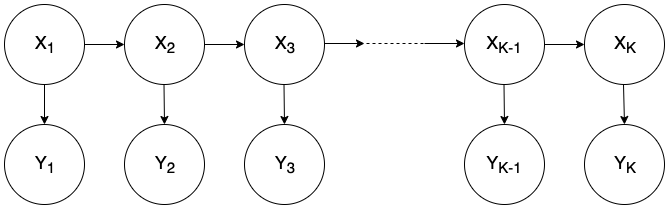

In [4]:
Image("GM1.png")

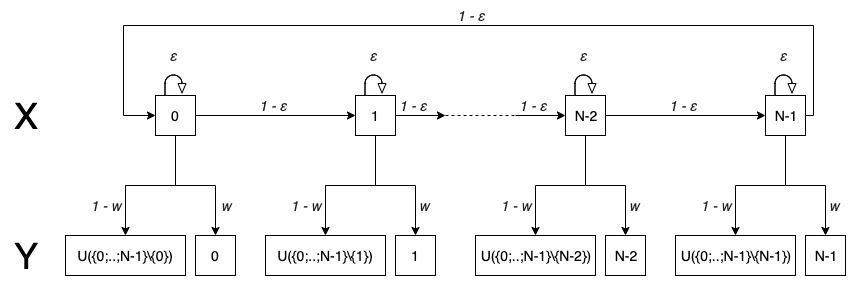

In [5]:
Image("GM2.png")

The joint distribution of $(X_k)_{k \in [\![1;K]\!]}$  and $(Y_k)_{k \in [\![1;K]\!]}$ is the following:

\begin{align}
P(Y_{1:K},X_{1:K}) &= P(X_1)P(Y_1|X_1)P(X_2|X_1)P(Y_2|X_2)...P(X_K|X_{K-1})P(Y_K|X_K) \\
           &= P(X_1)P(Y_1|X_1)\prod_{k=2}^K P(X_k|X_{k-1})P(Y_k|X_k)
\end{align}

### Task 2
**Initial position** of the robot : $\forall x_1 \in [\![0;N-1]\!]$: $P(X_1 = x_1) = \frac{1}{N}$

At each step $k$, the robot stays where it is with probability $\epsilon$, or moves to the next point in counter-clock direction with probability $1 - \epsilon$. 

The **transition model** is : 

$\forall k \in [\![1;K]\!]$,  

$$P(X_{k+1} = x_{k+1}|X_{k} = x_{k}) = \epsilon \delta(x_{k},x_{k+1}) + (1-\epsilon) \delta(x_{k}+1[N],x_{k+1}) \equiv M_{x_{k}, x_{k+1}}$$

with 
$\delta(i,j) =
\left\{
    \begin{array}{ll}
        1 \textrm{ if } i=j\\
        0 \textrm{ otherwise}
    \end{array}
\right.
$

Therefore : 
$$P(X_{k+1}|X_{k}) = \epsilon \textrm{I}_N + (1-\epsilon) \textrm{P}_N$$

with $\textrm{P}_N$ the circulant matrix of dimension $N$ :

$$\textrm{I}_N = \begin{bmatrix}
1 & 0 & \cdots & 0 \\
0 & \ddots & \ddots & \vdots \\
\vdots & \ddots & \ddots & 0 \\
0 & \cdots & 0 & 1 
\end{bmatrix}
\textrm{ and }
\textrm{P}_N =
\begin{bmatrix}
0 & 1 & 0 & \dots & 0 \\
0 & 0 & 1 & \ddots & \vdots \\
\vdots  & \ddots & \ddots & \ddots & 0  \\
0 & 0 & \ddots & 0 & 1 \\
1 & 0 & \dots & 0 & 0
\end{bmatrix}$$

$\forall k \in [\![1;K]\!]$ :

$$
P(X_{k+1}|X_{k}) \equiv M = 
\begin{bmatrix}
 \epsilon &1 - \epsilon&0&\ldots&0\\
 0 &\epsilon&\ddots&\ddots&\vdots\\
 \vdots&\ddots&\ddots&\ddots&0\\
 0&0&\ddots&\epsilon&1 - \epsilon\\
 1 - \epsilon&0&\ldots&0&\epsilon
\end{bmatrix}
$$


At each step $k$, the robot can observe its true position with probability $w$. With probability $1 - w$, the position sensor fails and gives a measurement that is independent from the true position (uniformly distributed). 

The **observation model** is :
$\forall k \in [\![1;K]\!]$,

$$P(Y_k|X_k) = w \textrm{I}_N + (1-w)\mathcal{U}(N-1)$$ 

with $dim(\mathcal{U}(N-1)) = N\textrm{x}N$ and : 

$$
\mathcal{U}(N-1) =
\begin{bmatrix}
 0&\frac{1}{N-1}&\ldots&\frac{1}{N-1}\\
 \frac{1}{N-1}&\ddots&\ddots&\vdots\\
 \vdots&\ddots&\ddots&\frac{1}{N-1}\\
 \frac{1}{N-1}&\ldots&\frac{1}{N-1}&0
\end{bmatrix}
$$

$\forall k \in [\![1;K]\!]$ :

$$
P(Y_k|X_k) \equiv O =
\begin{bmatrix}
 w&\frac{1-w}{N-1}&\ldots&\frac{1-w}{N-1}\\
 \frac{1-w}{N-1}&\ddots&\ddots&\vdots\\
 \vdots&\ddots&\ddots&\frac{1-w}{N-1}\\
 \frac{1-w}{N-1}&\ldots&\frac{1-w}{N-1}&w
\end{bmatrix}
$$

and :
$$P(Y_{k} = y_{k}|X_{k} = x_{k}) = O_{x_{k}, y_{k}}$$

### Task 3
Let $k$ be the current time step and $K$ the total number of time steps:

(a) Distribution of the robot’s current position given the observations so far : 
$$P(X_k|Y_{1:k} = y_{1:k})$$

(b) Distribution of the robot’s position at time step k given all the observations :
$$P(X_k|Y_{1:K} = y_{1:K})$$

(c) Distribution of the robot’s next position given the observations so far :
$$P(X_{k+1}|Y_{1:k}=y_{1:k})$$

(d) Distribution of the robot’s next sensor reading given the observations so far :
$$P(Y_{k+1}|Y_{1:k}=y_{1:k})$$

(e) Distribution of the robot’s initial position given observations so far :
$$P(X_{1}|Y_{1:k}=y_{1:k})$$

(f) Most likely current position of the robot given the observations so far : $$\textrm{argmax}_{x_k \in [\![0;N-1]\!]} P(X_k = x_k|Y_{1:k}=y_{1:k})$$

(g) Most likely trajectory taken by the robot from the start until now given the observations so far : $$\textrm{argmax}_{x_{1:k}\in [\![0;N-1]\!]^k} P(X_{1:k} = x_{1:k}|Y_{1:k}=y_{1:k})$$

### Task 4 : Simulation of the scenario

In [6]:
# Variables 
K, N = 100, 50
eps, w = 0.3, 0.8
I = np.eye(N)
P = np.concatenate((I[1:,:] , I[:1,:] ), axis=0)
M = eps * I + (1 - eps) * P
U = (np.ones([N,N]) - I) / (N-1)
O =  w * I + (1 - w) * U

def simulate_scenario(K, N, M, O):
    # -- Initialization
    pos = [i for i in range(N)]
    # Uniform distribution for initial position
    initial_law_X = np.ones(N)/(N)
    X = np.zeros([N,K])
    Y = np.zeros([N,K])
    # k = 0
    pos_X = random.choices(pos, initial_law_X)
    X[pos_X, 0] = 1
    pos_Y = random.choices(pos, np.dot(O, X[:,0]))
    Y[pos_Y, 0] = 1
    # -- Loop over step k
    for k in range(0,K-1):
        # -- Transition Model
        pos_X = random.choices(pos, np.dot(X[:,k],M))
        X[pos_X, k+1] = 1
        # -- Observation Model
        pos_Y = random.choices(pos, np.dot(X[:,k+1],O)) 
        Y[pos_Y, k+1] = 1
    X = [np.where(X[:,i]==1)[0][0] for i in range(K)]
    Y = [np.where(Y[:,i]==1)[0][0] for i in range(K)]
    return (X, Y)

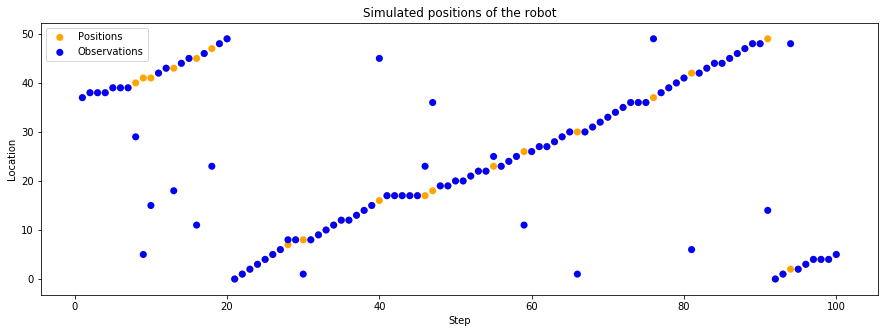

In [7]:
# -- Simulate scenario
X,Y = simulate_scenario(K, N, M, O)

# -- Display scenario
plt.figure(figsize=(15,5))
positions = plt.scatter([i for i in range(1, K+1)], X, c = 'orange', s = 50, marker = 'o', edgecolors='none')
observations = plt.scatter([i for i in range(1, K+1)], Y, c = 'blue', s = 50, marker = 'o', edgecolors='none')
plt.legend((positions, observations), ("Positions", "Observations"), loc='upper left')
plt.title("Simulated positions of the robot")
plt.xlabel("Step")
plt.ylabel("Location")
plt.show()

### Task 5 : Implement the Forward-Backward algorithm for computing the quantities defined in 3-a,b,f.

### Computing $P(X_k|Y_{1:k} = y_{1:k})$
At each step $k$, the observation $Y_k$ is fixed : $Y_k = y_k$ and $P(Y_k = y_k|X_k) = O_{.,y_k}$.

$P(X_k|Y_{1:k}= y_{1:k}) = \frac{P(X_k,Y_{1:k}= y_{1:k})}{P(Y_{1:k}= y_{1:k})} \propto P(X_k,Y_{1:k}= y_{1:k})$

Let $\alpha_{k|k} \equiv P(X_k,Y_{1:k} = y_{1:k})$ :


\begin{align}
\alpha_{k|k} &= P(X_k,Y_{1:k} = y_{1:k}) \\
           &= P(Y_k = y_{k}|X_{k},Y_{1:k-1}=y_{1:k-1})P(X_k,Y_{1:k-1} = y_{1:k-1}) \\
           &= P(Y_k= y_{k}|X_{k})P(X_k,Y_{1:k-1} = y_{1:k}) \\
           &= O_{.,y_k} P(X_k,Y_{1:k-1} = y_{1:k-1})
\end{align}

Let $\alpha_{k|k-1} \equiv P(X_k,Y_{1:k-1}= y_{1:k-1})$ : 

\begin{align}
\alpha_{k|k-1} &= P(X_k,Y_{1:k-1}= y_{1:k-1}) \\
           &= \sum_{x_{k-1}\in [\![0;N-1]\!]}P(X_k,X_{k-1}=x_{k-1},Y_{1:k-1}=y_{1:k-1}) \\
           &= \sum_{x_{k-1}\in [\![0;N-1]\!]}P(X_k|X_{k-1}=x_{k-1},Y_{1:k-1}=y_{1:k-1})P(X_{k-1}=x_{k-1},Y_{1:k-1}=y_{1:k-1}) \\
           &= \sum_{x_{k-1}\in [\![0;N-1]\!]}P(X_k|X_{k-1}=x_{k-1},Y_{1:k-1}=y_{1:k-1})\alpha_{k-1|k-1}(x_{k-1})\\
           &= \sum_{x_{k-1}\in [\![0;N-1]\!]}P(X_k|X_{k-1}=x_{k-1})\alpha_{k-1|k-1}(x_{k-1})\\
           &= \sum_{x_{k-1}\in [\![0;N-1]\!]}M_{x_{k-1},.} \alpha_{k-1|k-1}(x_{k-1})\\
           &= M^T \alpha_{k-1|k-1}
\end{align}

Therefore :

$
\left\{
    \begin{array}{ll}
        \alpha_{1|0} = P(X_1)\\
        \alpha_{1|1} = P(Y_1 = y_1|X_1)\alpha_{1|0}
    \end{array}
\right.
$
$\forall k \in [\![2;K]\!]$:
$
\left\{
    \begin{array}{ll}
        \alpha_{k|k-1} = M^T \alpha_{k-1|k-1}\\
        \alpha_{k|k} = O_{.,y_k} \alpha_{k|k-1} 
    \end{array}
\right.
$

and

$$P(X_k|Y_{1:k} = y_{1:k}) \propto \alpha_{k|k}$$

### Computing $p(X_k | Y_{1:K} = y_{1:K})$

$p(X_k | Y_{1:K} = y_{1:K}) = \frac{P(X_k, Y_{1:K} = y_{1:K})}{P(Y_{1:K} = y_{1:K})} \propto P(X_k,Y_{1:K}= y_{1:K})$


$\begin{equation}\begin{split}
P(X_k, Y_{1:K}= y_{1:K}) &= P(X_k, Y_{1:k}= y_{1:k}, Y_{k+1:K}= y_{k+1:K}) \\
&= P(Y_{k+1:K}=y_{k+1:K} | X_k, Y_{1:k}=y_{1:k})P(X_k, Y_{1:k}=y_{1:k}) \\
&= P(Y_{k+1:K}=y_{k+1:K} | X_k)P(X_k, Y_{1:k}=y_{1:k}) \\
&= P(Y_{k+1:K}=y_{k+1:K} | X_k)\alpha_{k|k}
\end{split}\end{equation}$

Let $\beta_{k|k+1} \equiv P(Y_{k+1:K}=y_{k+1:K} | X_k)$ :

\begin{equation}\begin{split}
\beta_{k|k+1} &= P(Y_{k+1:K} =y_{k+1:K}| X_k) \\
&= \sum_{x_{k+1}\in [\![0;N-1]\!]}P(Y_{k+1:K}=y_{k+1:K},X_{k+1}=x_{k+1}| X_k) \\
&= \sum_{x_{k+1}\in [\![0;N-1]\!]} P(X_{k+1}=x_{k+1}| X_k) P(Y_{k+1:K}=y_{k+1:K}| X_{k+1}=x_{k+1}) \\
&= \sum_{x_{k+1}\in [\![0;N-1]\!]} M_{.,x_{k+1}} P(Y_{k+1:K}=y_{k+1:K}| X_{k+1}=x_{k+1})\\
&= M P(Y_{k+1:K}=y_{k+1:K}| X_{k+1})
\end{split}\end{equation}

Let $\beta_{k|k} \equiv P(Y_{k:K}=y_{k:K} | X_k)$ 

\begin{equation}\begin{split}
\beta_{k|k} &= P(Y_{k:K}=y_{k:K}| X_{k}) \\
&= P(Y_{k}=y_{k},Y_{k+1:K}=y_{k+1:K}| X_{k})  \\
&= P(Y_{k}=y_{k}| X_{k}) P(Y_{k+1:K}=y_{k+1:K}| X_{k})\\
&= O_{.,y_k} P(Y_{k+1:K}=y_{k+1:K}| X_{k}) \\
&= O_{.,y_k} \beta_{k|k+1}
\end{split}\end{equation}

Therefore :

$
\left\{
    \begin{array}{ll}
        \beta_{K|K+1} \equiv 1\\
        \beta_{K|K} = P(Y_K=y_K|X_K)
    \end{array}
\right.
$
$\forall k \in [\![1;K-1]\!]$ :
$
\left\{
    \begin{array}{ll}
        \beta_{k|k+1} = M \beta_{k+1|k+1}\\
        \beta_{k|k} = O_{.,y_k} \beta_{k|k+1}
    \end{array}
\right.
$

and

$$P(X_k | Y_{1:K}=y_{1:K}) \propto \beta_{k|k+1} \alpha_{k|k} \equiv \gamma_{k}$$

### Computing  $\textrm{argmax}_{x_k \in [\![0;N-1]\!]} P(X_k = x_k|Y_{1:k}=y_{1:k})$

$P(X_k = x_k|Y_{1:k}=y_{1:K}) = \frac{P(X_k = x_k,Y_{1:k}=y_{1:K})}{p(Y_{1:k}=y_{1:K})} \propto \alpha_{k|k}(x_k)$

$\forall k \in [\![1;K-1]\!]$ :

$$\textrm{argmax}_{x_k \in [\![0;N-1]\!]} P(X_k = x_k|Y_{1:k}=y_{1:K}) = \textrm{argmax}_{x_k \in [\![0;N-1]\!]} \frac{\alpha_{k|k}(x_k)}{p(Y_{1:k}=y_{1:K})} $$


Let us implement the Forward-Backward algorithm for computing the quantities defined in 3-a,b,f :
* the forward pass consists in computing $\alpha_{k|k}$
* the backward pass consists in computing $\beta_{k|k+1}$

### Forward pass

We have :

$
\left\{
    \begin{array}{ll}
        \log  \alpha_{1|0} = \log P(X_1)\\
        \log \alpha_{1|1} = \log P(Y_1 = y_1|X_1) + \log \alpha_{1|0}
    \end{array}
\right.
$

$\forall k \in [\![2;K]\!]$ :

$
\left\{
    \begin{array}{ll}
        \log \alpha_{k|k-1} = \log \big( M^T \alpha_{k-1|k-1}\big)\\
        \log \alpha_{k|k} = \log O_{.,y_k} + \log \alpha_{k|k-1} 
    \end{array}
\right.
$

$\log \alpha_{k|k-1} = \log \big( M^T \alpha_{k-1|k-1}\big) = \log \big(\sum_{x_{k-1}\in [\![0;N-1]\!]}M_{x_{k-1},.} \alpha_{k-1|k-1}(x_{k-1})\big)$

Let $v^* \equiv \max \big(\log \alpha_{k-1|k-1}\big)$
\begin{align}
\log \alpha_{k|k-1} &= \log \bigg(\sum_{x_{k-1}\in [\![0;N-1]\!]}M_{x_{k-1},.} \alpha_{k-1|k-1}(x_{k-1})\bigg) \\
        &= \log \bigg(\sum_{x_{k-1}\in [\![0;N-1]\!]}M_{x_{k-1},.} \exp \big(\log \alpha_{k-1|k-1}(x_{k-1})\big)\bigg) \\
           &= \log \bigg(\sum_{x_{k-1}\in [\![0;N-1]\!]}M_{x_{k-1},.} \exp\big(\log\alpha_{k-1|k-1}(x_{k-1})\big)\exp\big(v^* - v^*\big)\bigg) \\
           &= \log \bigg(\exp\big(v^*\big)\sum_{x_{k-1}\in [\![0;N-1]\!]}M_{x_{k-1},.} \exp\big(\log \alpha_{k-1|k-1}(x_{k-1}) - v^*\big)\bigg) \\
           &= v^*  + \log \bigg(\sum_{x_{k-1}\in [\![0;N-1]\!]}M_{x_{k-1},.} \exp\big(\log \alpha_{k-1|k-1}(x_{k-1}) - v^*\big)\bigg) \\
           &= v^* +  \log \big(M^T\exp\big(\log \alpha_{k-1|k-1} - v^*\big)\big)
\end{align}

Let's implement it in Python.

In [8]:
def log_sum_exp(A, v):
    v_max = max(v)
    return v_max + np.log(np.dot(A, np.exp(v - v_max)))

In [9]:
def forward(N, M, O, Y):
    # -- Initialization
    # Uniform distribution for initial position
    initial_law_X = np.ones(N)/N
    log_alpha_pred = np.zeros([N,K])
    log_alpha_k = np.zeros([N,K])
    # k = 0
    log_alpha_pred[:, 0] = np.log(initial_law_X)
    log_alpha_k[:, 0] = np.log(O[:,Y[0]]) + log_alpha_pred[:, 0]
    # -- Loop over step k
    for k in range(0,K-1):        
        log_alpha_pred[:, k+1] = log_sum_exp(np.transpose(M), log_alpha_k[:, k])
        log_alpha_k[:, k+1] = np.log(O[:,Y[k+1]]) + log_alpha_pred[:, k+1]
    return (log_alpha_pred, log_alpha_k)

### Backward pass

We have :

$
\left\{
    \begin{array}{ll}
        \log \beta_{K|K+1} = 0\\
        \log \beta_{K|K} = \log P(Y_K=y_K|X_K)
    \end{array}
\right.
$
$\forall k \in [\![1;K-1]\!]$ :
$
\left\{
    \begin{array}{ll}
        \log \beta_{k|k+1} = \log \big(M \beta_{k+1|k+1}\big)\\\
        \log \beta_{k|k} = \log O_{.,y_k} + \log \beta_{k|k+1}
    \end{array}
\right.
$

Let $v^* \equiv \max \big(\log \beta_{k+1|k+1}\big)$

\begin{align}
\log \beta_{k|k+1} &= log \big( M \beta_{k+1|k+1}\big)\\
           &= v^* +  \log \big(M \exp\big(\log(\beta_{k+1|k+1}) - v^*\big)\big)
\end{align}


In [10]:
def backward(N, M, O, Y):
    # -- Initialization
    log_beta_pred = np.zeros([N,K])
    log_beta_k = np.zeros([N,K])
    # k = K
    log_beta_k[:, K-1] = np.log(O[:,Y[K-1]])
    # -- Loop over step k
    for k in range(K-1,0,-1):       
        log_beta_pred[:, k-1] = log_sum_exp(M, log_beta_k[:, k])
        log_beta_k[:, k-1] = np.log(O[:,Y[k-1]]) + log_beta_pred[:, k-1]
    return (log_beta_pred, log_beta_k)

We have :
$
\left\{
    \begin{array}{ll}
        P(X_k|Y_{1:k} = y_{1:k}) = \frac{P(X_k,Y_{1:k}= y_{1:k})}{P(Y_{1:k}= y_{1:k})} = \frac{\alpha_{k|k}}{P(Y_{1:k}= y_{1:k})}\\
        p(X_k | Y_{1:K} = y_{1:K}) = \frac{P(X_k, Y_{1:K} = y_{1:K})}{P(Y_{1:K} = y_{1:K})} = \frac{\beta_{k|k+1} \alpha_{k|k}}{P(Y_{1:K} = y_{1:K})}
    \end{array}
\right.
$

Therefore :
$
\left\{
    \begin{array}{ll}
        \log P(X_k|Y_{1:k}= y_{1:k}) = \textrm{log_alpha_k}[:, k-1] - \log P(Y_{1:k}= y_{1:k}) \\
        \log p(X_k | Y_{1:K}= y_{1:K}) = (\textrm{log_beta_pred}+\textrm{log_alpha_k})[:, k-1] - \log P(Y_{1:K} = y_{1:K})
    \end{array}
\right.
$

To retrieve the constants $\log P(Y_{1:k}= y_{1:k})$ and $\log P(Y_{1:K} = y_{1:K})$, we can just use the $\exp$ function to work with probabilities, and then compute the normalizing constants, as for each step $k$, the probabilities have to sum to $1$.

Let's implement it in Python and compute : 
* the most likely current position of the robot given the observations so far (filtering) : $\textrm{argmax}_{x_k \in [\![0;N-1]\!]} P(X_k = x_k|Y_{1:k}=y_{1:k})$
* the most likely current position of the robot given all the observations (smoothing) : $\textrm{argmax}_{x_k \in [\![0;N-1]\!]} P(X_k = x_k|Y_{1:K}=y_{1:K})$

In [11]:
def proba_filtering(log_alpha_k):
    return normalizing_constant(log_alpha_k)
    
def proba_smoothing(log_beta_pred, log_alpha_k):
    return normalizing_constant(log_beta_pred + log_alpha_k)

def normalizing_constant(log_proba):
    log_proba_max = np.max(log_proba, axis=0)
    C = np.sum(np.exp(log_proba - log_proba_max), axis=0)
    return np.exp(log_proba - log_proba_max) / C      

In [12]:
log_alpha_pred, log_alpha_k = forward(N, M, O, Y)
log_beta_pred, log_beta_k = backward(N, M, O, Y)

alpha_k = proba_filtering(log_alpha_k)
gamma_k = proba_smoothing(log_beta_pred, log_alpha_k)

most_likely_proba_filtering = np.max(alpha_k, axis=0)
most_likely_pos_filtering = [np.where(alpha_k[:,i] == most_likely_proba_filtering[i])[0][0] 
                        for i in range(K)]
most_likely_proba_smoothing = np.max(gamma_k, axis=0)
most_likely_pos_smoothing = [np.where(gamma_k[:,i] == most_likely_proba_smoothing[i])[0][0] 
                        for i in range(K)]

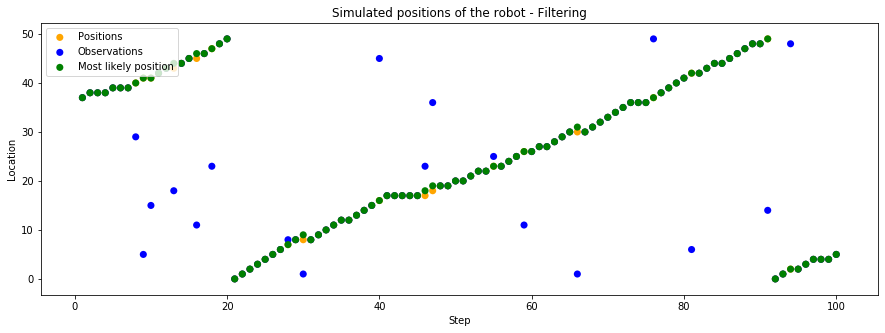

In [13]:
plt.figure(figsize=(15,5))
positions = plt.scatter([i for i in range(1, K+1)], X, c = 'orange', s = 50, marker = 'o', edgecolors='none')
observations = plt.scatter([i for i in range(1, K+1)], Y, c = 'blue', s = 50, marker = 'o', edgecolors='none')
most_likely = plt.scatter([i for i in range(1, K+1)], most_likely_pos_filtering, c = 'green', s = 50, marker = 'o', edgecolors='none')
plt.legend((positions, observations, most_likely), ("Positions", "Observations", "Most likely position"), loc='upper left')
plt.title("Simulated positions of the robot - Filtering")
plt.xlabel("Step")
plt.ylabel("Location")
plt.show()

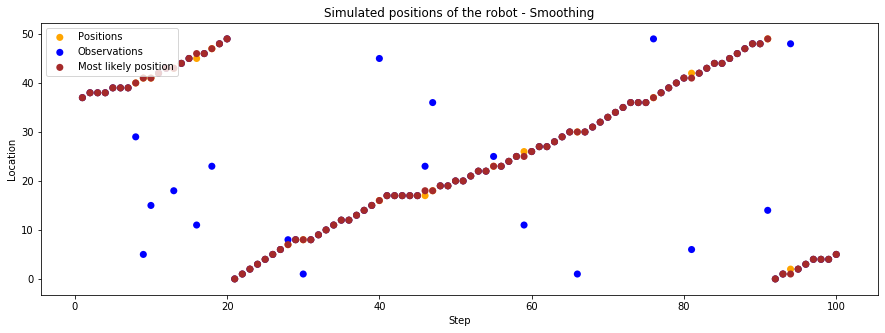

In [14]:
plt.figure(figsize=(15,5))
positions = plt.scatter([i for i in range(1, K+1)], X, c = 'orange', s = 50, marker = 'o', edgecolors='none')
observations = plt.scatter([i for i in range(1, K+1)], Y, c = 'blue', s = 50, marker = 'o', edgecolors='none')
most_likely = plt.scatter([i for i in range(1, K+1)], most_likely_pos_smoothing, c = 'brown', s = 50, marker = 'o', edgecolors='none')
plt.legend((positions, observations, most_likely), ("Positions", "Observations", "Most likely position"), loc='upper left')
plt.title("Simulated positions of the robot - Smoothing")
plt.xlabel("Step")
plt.ylabel("Location")
plt.show()

### Task 6 : Kidnapping

At each step $k$ the robot can be kidnapped with probability $\kappa$. If the robot is kidnapped its new position is independent from its previous position and is uniformly distributed. In this situation, we can reuse our code for the simulation of the scenario and the Forward-Backward algorithm. In fact, only the transition matrix is impacted by the event of a kidnapping. We can create a new matrix $M_{\textrm{kidnap}}$ corresponding to the transition matrix from one step to another in the case of a kidnapping. As the new position is independent from its previous position and is uniformly distributed, we have :

$$M_{\textrm{kidnap}} =
\begin{bmatrix}
 \frac{1}{N}&\ldots&\frac{1}{N}\\
 \vdots&\ddots&\vdots\\
 \frac{1}{N}&\ldots&\frac{1}{N}
\end{bmatrix}
$$

The new transition matrix of the model is therefore : 

$$(1 - \kappa) M + \kappa M_{\textrm{kidnap}}$$ 

Let's redo tasks $4$ and $5$ with this new transition matrix.

In [15]:
# Probability of the robot being kidnapped
kappa = 0.1
M_kidnap =  np.ones([N,N]) / N
M_new = (1-kappa)*M + kappa*M_kidnap

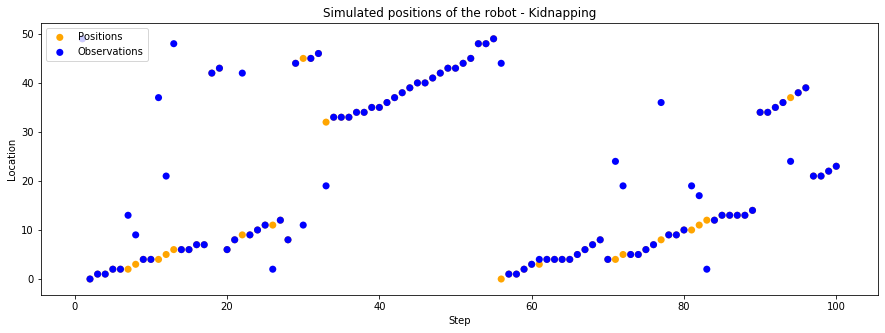

In [16]:
X,Y = simulate_scenario(K, N, M_new, O)
plt.figure(figsize=(15,5))
positions = plt.scatter([i for i in range(1, K+1)], X, c = 'orange', s = 50, marker = 'o', edgecolors='none')
observations = plt.scatter([i for i in range(1, K+1)], Y, c = 'blue', s = 50, marker = 'o', edgecolors='none')
plt.legend((positions, observations), ("Positions", "Observations"), loc='upper left')
plt.title("Simulated positions of the robot - Kidnapping")
plt.xlabel("Step")
plt.ylabel("Location")
plt.show()

In [17]:
log_alpha_pred, log_alpha_k = forward(N, M_new, O, Y)
log_beta_pred, log_beta_k = backward(N, M_new, O, Y)

alpha_k = proba_filtering(log_alpha_k)
gamma_k = proba_smoothing(log_alpha_k, log_beta_pred)

most_likely_proba_filtering = np.max(alpha_k, axis=0)
most_likely_pos_filtering = [np.where(alpha_k[:,i] == most_likely_proba_filtering[i])[0][0] 
                        for i in range(K)]
most_likely_proba_smoothing = np.max(gamma_k, axis=0)
most_likely_pos_smoothing = [np.where(gamma_k[:,i] == most_likely_proba_smoothing[i])[0][0] 
                        for i in range(K)]

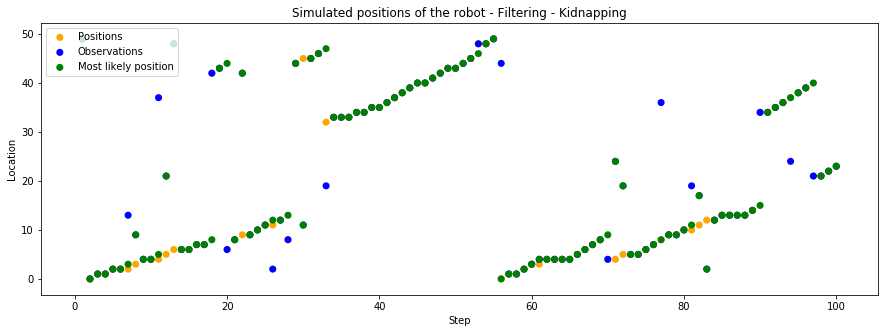

In [18]:
plt.figure(figsize=(15,5))
positions = plt.scatter([i for i in range(1, K+1)], X, c = 'orange', s = 50, marker = 'o', edgecolors='none')
observations = plt.scatter([i for i in range(1, K+1)], Y, c = 'blue', s = 50, marker = 'o', edgecolors='none')
most_likely = plt.scatter([i for i in range(1, K+1)], most_likely_pos_filtering, c = 'green', s = 50, marker = 'o', edgecolors='none')
plt.legend((positions, observations, most_likely), ("Positions", "Observations", "Most likely position"), loc='upper left')
plt.title("Simulated positions of the robot - Filtering - Kidnapping")
plt.xlabel("Step")
plt.ylabel("Location")
plt.show()

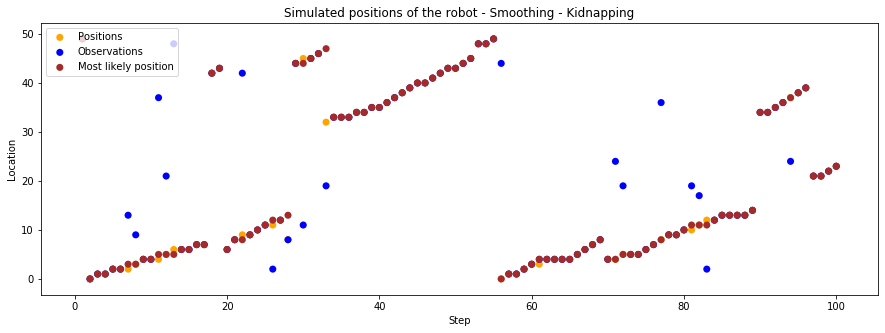

In [19]:
plt.figure(figsize=(15,5))
positions = plt.scatter([i for i in range(1, K+1)], X, c = 'orange', s = 50, marker = 'o', edgecolors='none')
observations = plt.scatter([i for i in range(1, K+1)], Y, c = 'blue', s = 50, marker = 'o', edgecolors='none')
most_likely = plt.scatter([i for i in range(1, K+1)], most_likely_pos_smoothing, c = 'brown', s = 50, marker = 'o', edgecolors='none')
plt.legend((positions, observations, most_likely), ("Positions", "Observations", "Most likely position"), loc='upper left')
plt.title("Simulated positions of the robot - Smoothing - Kidnapping")
plt.xlabel("Step")
plt.ylabel("Location")
plt.show()